In [254]:
import plotly.express as px # Para el gráfico
import random as rd # Resultados
from collections import Counter # Para contar los valores
import pandas as pd # Para la visualización de los resultados

In [270]:
def tirar_dados(dados=2, veces=10, caras=6):
    resultados = {} # Crear el diccionario donde se almacenarán los datos
    suma = [] # Lista donde se almacenará la suma
    for i in range(dados):
        resultados[f"dado {i+1}"] = [rd.randint(1,caras) for _ in range(veces)] # Añadir al diccionario los dados y los resultados
    
    suma = [sum(valores) for valores in zip(*resultados.values())] # Sumamos los valores de cada dado
    frecuencias = Counter(suma) # Contamos la frecuencia de cada valor
    df = pd.DataFrame([frecuencias]).T.sort_index() # Creamos un dataframe ordenado
    df.rename(columns={0: "Frecuencia"}, inplace = True) # Renombramos la columna "0" por un nombre mas adecuado
    df["Frecuencia relativa"] = df["Frecuencia"] / veces # Creamos una columna que de la frecuencia relativa

    
    return df
    

In [ ]:
df = tirar_dados(dados=3,veces=90000000, caras=6)
df

In [326]:
def grafico(df, columna=True):
    df.index.name = 'Suma de los dados' # Plotly no reconoce el nombre si lo definimos en "labels"
    # Crear el gráfico de barras
    fig = px.bar(df, 
                 x=df.index, # Eje x
                 y="Frecuencia" if columna else "Frecuencia relativa" , # Eje y
                 text="Frecuencia" if columna else "Frecuencia relativa",  # Mostrar los valores de y sobre las barras
                 labels={'y': 'Frecuencia'},  # Etiquetas personalizadas
                 title="Distribución de resultados")  # Título del gráfico
    
    fig.update_xaxes(tickvals=df.index) # Muestra todos los valores del eje x
    
    fig.update_layout(width=1000, height=600) # Ajusta el tamaños del gráfico
    fig.show() # Muestra el gráfico

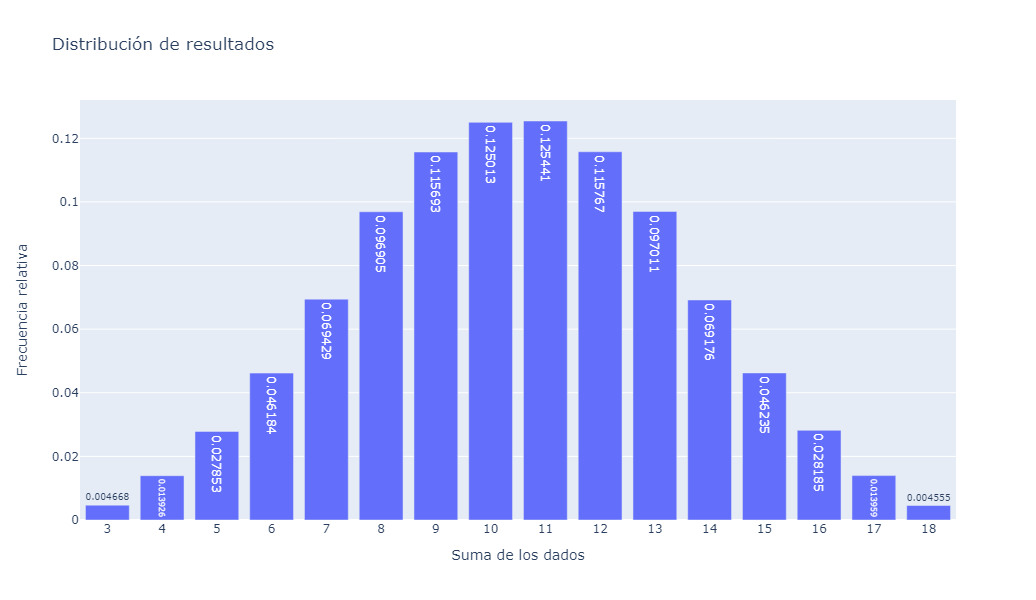

In [364]:
grafico(df= df,columna=False) # El segundo argumento muestra la Frec. (True) o la Frec. Relativa (False)

# NOTA: Si no se especifica se muestra la Frec.